# 2 - Adaline and Madaline

## 2.1 - Adaline for breast cancer classification

##### 2.1.1 

##### 2.1.2 - Import required libraries and dowlonad the dataset 

In [130]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Conversion of an array with ndim > 0 to a scalar is deprecated")


data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

##### Divide the dataset into training and testing datasets with a ration of 7 to 3

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
df_train = pd.DataFrame(X_train, columns=feature_names)
df_test = pd.DataFrame(X_test, columns=feature_names)

##### Display the shape of the data

In [132]:
print("Full shape:", X.shape, "Labels shape:", y.shape)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nClass distribution (full):\n", pd.Series(y).value_counts().sort_index())
print("\nClass distribution (train):\n", pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution (test):\n", pd.Series(y_test).value_counts().sort_index())

Full shape: (569, 30) Labels shape: (569,)
Train shape: (398, 30) Test shape: (171, 30)

Class distribution (full):
 0    212
1    357
Name: count, dtype: int64

Class distribution (train):
 0    148
1    250
Name: count, dtype: int64

Class distribution (test):
 0     64
1    107
Name: count, dtype: int64


##### Normalize data and report dataset statistics

In [133]:
print("\nTraining data statistics (before normalization):")
print(df_train.describe().T)




Training data statistics (before normalization):
                         count        mean         std         min  \
mean radius              398.0   14.104367    3.622681    7.691000   
mean texture             398.0   19.219322    4.271260    9.710000   
mean perimeter           398.0   91.810477   24.976230   47.920000   
mean area                398.0  654.679397  363.900604  170.400000   
mean smoothness          398.0    0.096044    0.013946    0.052630   
mean compactness         398.0    0.104132    0.053261    0.019380   
mean concavity           398.0    0.088673    0.078367    0.000000   
mean concave points      398.0    0.049033    0.039399    0.000000   
mean symmetry            398.0    0.180104    0.027006    0.106000   
mean fractal dimension   398.0    0.062739    0.007086    0.049960   
radius error             398.0    0.401333    0.287800    0.111500   
texture error            398.0    1.211003    0.543530    0.360200   
perimeter error          398.0    2.8505

In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nTraining data statistics (after StandardScaler):")
print(df_train_scaled.describe().T)


Training data statistics (after StandardScaler):
                         count          mean       std       min       25%  \
mean radius              398.0 -3.338480e-15  1.001259 -1.772565 -0.706682   
mean texture             398.0 -6.739444e-16  1.001259 -2.229153 -0.714229   
mean perimeter           398.0  6.045415e-15  1.001259 -1.759502 -0.714095   
mean area                398.0  1.740651e-16  1.001259 -1.332476 -0.676390   
mean smoothness          398.0 -3.628588e-15  1.001259 -3.117028 -0.752393   
mean compactness         398.0  4.284680e-16  1.001259 -1.593253 -0.765528   
mean concavity           398.0  1.539807e-16  1.001259 -1.132924 -0.761735   
mean concave points      398.0  3.057298e-16  1.001259 -1.246069 -0.735204   
mean symmetry            398.0 -6.114595e-16  1.001259 -2.747421 -0.677684   
mean fractal dimension   398.0  2.499397e-15  1.001259 -1.805583 -0.714094   
radius error             398.0  8.212303e-16  1.001259 -1.008329 -0.614941   
texture error 

##### 2.1.3 - Implementing Adaline from scratch

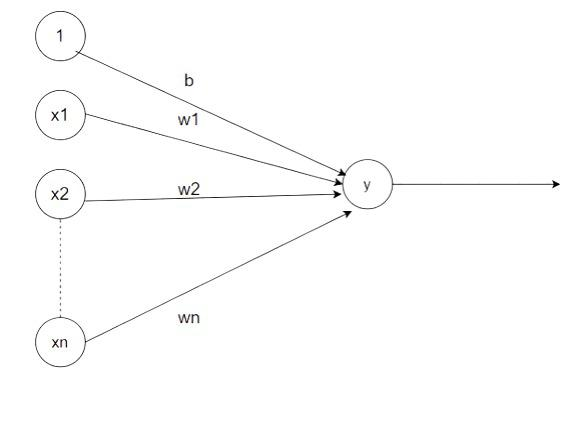

In [135]:
class Adaline:
    def __init__(self, lr, stop, n_iter, Input, l2=0.001):
        self.lr = lr
        self.stop = stop
        self.n_iter = n_iter
        self.l2 = l2
        np.random.seed(1)
        self.weights = np.random.random(len(Input[0]))
        self.bias = np.random.random(1)
        
    def train_NN(self, Input, Target):
        weights = self.weights
        bias = self.bias
        MSE = self.stop + 1
        stop = self.stop
        epoch_counter = 1
        training_MSEs = []
        training_accuracies = []
        while (MSE > stop and epoch_counter <= self.n_iter):
            MSE = 0
            print(f"Epoch {epoch_counter}/{self.n_iter} : ")
            for i in range(len(Input)):
                net = 0
                for j in range(len(weights)):
                    net += weights[j] * Input[i][j]
                net += bias
                for j in range(len(weights)):
                    weights[j] = weights[j] + self.lr * ((Target[i] - net) * Input[i][j] - self.l2 * weights[j])
                bias = bias + self.lr * (Target[i] - net)
                MSE += ((Target[i] - net)**2 + self.l2 * np.sum(weights**2))/len(Input[0])
                
            epoch_pred, _ = self.predict(Input)
            accuracy = metrics.accuracy_score(Target, epoch_pred)    
            training_accuracies.append(accuracy)
            training_MSEs.append(MSE)
            print("Epoch MSE : ", MSE)
            print("Epoch accuracy : ", accuracy)
            epoch_counter += 1
        return training_MSEs, training_accuracies
    
    def predict(self, Input):
        weights = self.weights
        bias = self.bias
        predictions = []
        scores = []
        for i in range(len(Input)):
            pred = 0
            for j in range(len(weights)):
                pred += weights[j]*Input[i][j]
            pred += bias
            scores.append(pred)
            if pred >= 0:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions, scores


##### Adaline with learning rate = 0.001

In [136]:
Adaline_NN_1 = Adaline(lr=0.001, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_1, acc_1 = Adaline_NN_1.train_NN(X_train_scaled, y_train)
y_pred_1, y_scores_1 = Adaline_NN_1.predict(X_test_scaled)


Epoch 1/50 : 
Epoch MSE :  [115.75415621]
Epoch accuracy :  0.5979899497487438
Epoch 2/50 : 
Epoch MSE :  [8.91777077]
Epoch accuracy :  0.7035175879396985
Epoch 3/50 : 
Epoch MSE :  [4.39238055]
Epoch accuracy :  0.8065326633165829
Epoch 4/50 : 
Epoch MSE :  [2.96167853]
Epoch accuracy :  0.8291457286432161
Epoch 5/50 : 
Epoch MSE :  [2.35436153]
Epoch accuracy :  0.8366834170854272
Epoch 6/50 : 
Epoch MSE :  [2.02615541]
Epoch accuracy :  0.8492462311557789
Epoch 7/50 : 
Epoch MSE :  [1.81815156]
Epoch accuracy :  0.8592964824120602
Epoch 8/50 : 
Epoch MSE :  [1.67248149]
Epoch accuracy :  0.871859296482412
Epoch 9/50 : 
Epoch MSE :  [1.56350561]
Epoch accuracy :  0.8793969849246231
Epoch 10/50 : 
Epoch MSE :  [1.47814221]
Epoch accuracy :  0.8819095477386935
Epoch 11/50 : 
Epoch MSE :  [1.40902989]
Epoch accuracy :  0.8844221105527639
Epoch 12/50 : 
Epoch MSE :  [1.35170407]
Epoch accuracy :  0.8944723618090452
Epoch 13/50 : 
Epoch MSE :  [1.30328084]
Epoch accuracy :  0.89698492462

##### Adaline with learning rate = 0.005

In [137]:
Adaline_NN_2 = Adaline(lr=0.005, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_2, acc_2 = Adaline_NN_2.train_NN(X_train_scaled, y_train)
y_pred_2, y_scores_2 = Adaline_NN_2.predict(X_test_scaled)

Epoch 1/50 : 
Epoch MSE :  [29.74834157]
Epoch accuracy :  0.7964824120603015
Epoch 2/50 : 
Epoch MSE :  [2.09600514]
Epoch accuracy :  0.8567839195979899
Epoch 3/50 : 
Epoch MSE :  [1.50675108]
Epoch accuracy :  0.8844221105527639
Epoch 4/50 : 
Epoch MSE :  [1.27376181]
Epoch accuracy :  0.9120603015075377
Epoch 5/50 : 
Epoch MSE :  [1.15064838]
Epoch accuracy :  0.9221105527638191
Epoch 6/50 : 
Epoch MSE :  [1.07350033]
Epoch accuracy :  0.9321608040201005
Epoch 7/50 : 
Epoch MSE :  [1.01938122]
Epoch accuracy :  0.9371859296482412
Epoch 8/50 : 
Epoch MSE :  [0.97865409]
Epoch accuracy :  0.9447236180904522
Epoch 9/50 : 
Epoch MSE :  [0.94667358]
Epoch accuracy :  0.9472361809045227
Epoch 10/50 : 
Epoch MSE :  [0.92088481]
Epoch accuracy :  0.9472361809045227
Epoch 11/50 : 
Epoch MSE :  [0.89971372]
Epoch accuracy :  0.9522613065326633
Epoch 12/50 : 
Epoch MSE :  [0.88210364]
Epoch accuracy :  0.9623115577889447
Epoch 13/50 : 
Epoch MSE :  [0.86730174]
Epoch accuracy :  0.96231155778

##### Adaline with learning rate = 0.02

In [138]:
Adaline_NN_3 = Adaline(lr=0.02, n_iter=50, stop=0.01, Input=X_train_scaled)
errors_3, acc_3 = Adaline_NN_3.train_NN(X_train_scaled, y_train)
y_pred_3, y_scores_3 = Adaline_NN_3.predict(X_test_scaled)

Epoch 1/50 : 
Epoch MSE :  [12.74714663]
Epoch accuracy :  0.8341708542713567
Epoch 2/50 : 
Epoch MSE :  [1.8953904]
Epoch accuracy :  0.8793969849246231
Epoch 3/50 : 
Epoch MSE :  [1.48801078]
Epoch accuracy :  0.9195979899497487
Epoch 4/50 : 
Epoch MSE :  [1.28450066]
Epoch accuracy :  0.9396984924623115
Epoch 5/50 : 
Epoch MSE :  [1.17342548]
Epoch accuracy :  0.9472361809045227
Epoch 6/50 : 
Epoch MSE :  [1.10928392]
Epoch accuracy :  0.9472361809045227
Epoch 7/50 : 
Epoch MSE :  [1.07003582]
Epoch accuracy :  0.9472361809045227
Epoch 8/50 : 
Epoch MSE :  [1.04452283]
Epoch accuracy :  0.9472361809045227
Epoch 9/50 : 
Epoch MSE :  [1.02703212]
Epoch accuracy :  0.949748743718593
Epoch 10/50 : 
Epoch MSE :  [1.01458772]
Epoch accuracy :  0.949748743718593
Epoch 11/50 : 
Epoch MSE :  [1.00555306]
Epoch accuracy :  0.9522613065326633
Epoch 12/50 : 
Epoch MSE :  [0.99893666]
Epoch accuracy :  0.9522613065326633
Epoch 13/50 : 
Epoch MSE :  [0.99406976]
Epoch accuracy :  0.95477386934673

##### Choose model with least training error

In [139]:
final_errors = [errors_1[-1], errors_2[-1], errors_3[-1]]
final_accs = [acc_1[-1], acc_2[-1], acc_3[-1]]

predictions = [y_pred_1, y_pred_2, y_pred_3]
scores = [y_scores_1, y_scores_2, y_scores_3]
models = [Adaline_NN_1, Adaline_NN_2, Adaline_NN_3]
best_idx = np.argmax(final_accs)
best_predictions = predictions[best_idx]
best_scores = scores[best_idx]
print(f"Best model is model #{best_idx+1} with training accuracy {final_accs[best_idx]}")

Best model is model #2 with training accuracy 0.9748743718592965


##### Accuracy, Precision, Recall, F1

In [140]:
accuracy = metrics.accuracy_score(y_test, best_predictions)
precision = metrics.precision_score(y_test, best_predictions)
recall = metrics.recall_score(y_test, best_predictions)
f1 = metrics.f1_score(y_test, best_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9590643274853801
Precision: 0.9545454545454546
Recall: 0.9813084112149533
F1 Score: 0.967741935483871


##### Confusion Matrix

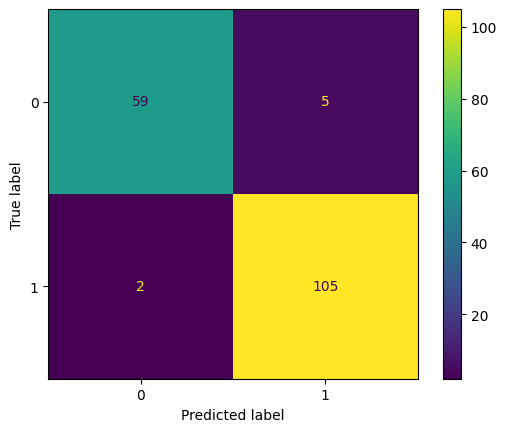

In [141]:
confusion_matrix = metrics.confusion_matrix(y_test, best_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


##### ROC/AUC

ROC AUC:  0.9884637850467289


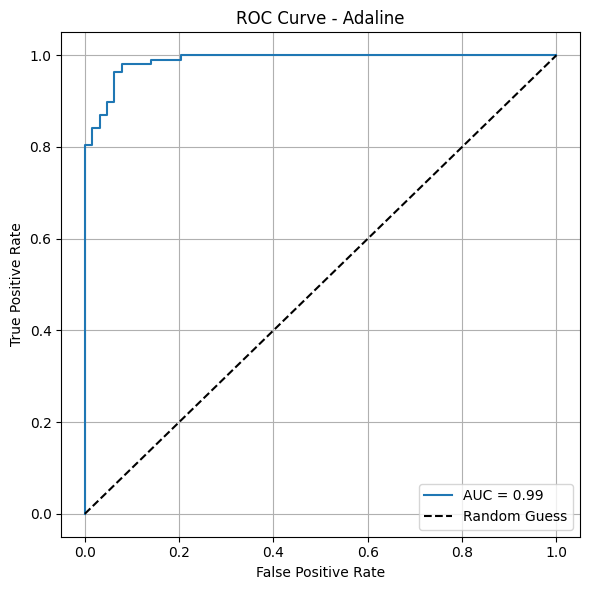

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_scores)
auc = metrics.roc_auc_score(y_test, best_scores)

print(f"ROC AUC: ", auc)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Adaline")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


##### PCA

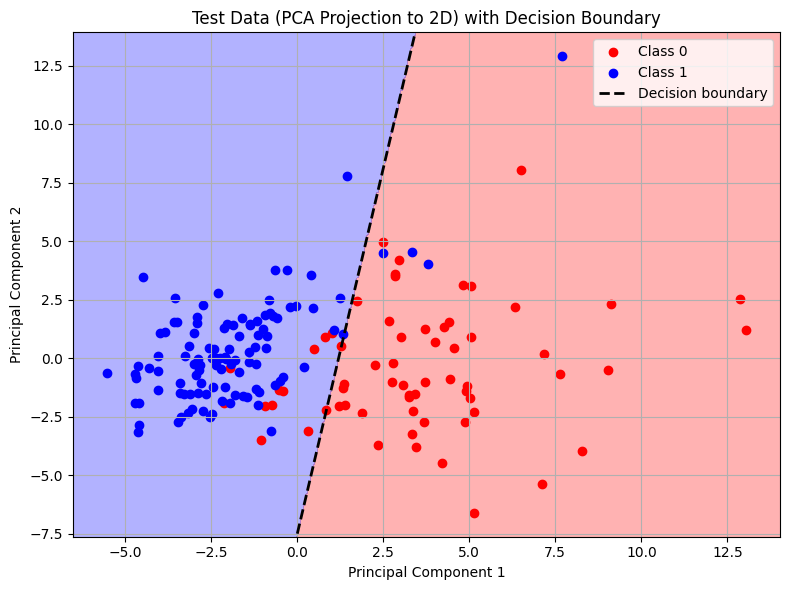

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

best_model = models[best_idx]
w_pca = pca.components_ @ best_model.weights
w = np.array(w_pca)
b = best_model.bias

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

if w[1] != 0:
    zz = w[0] * xx + w[1] * yy + b
else:
    zz = w[0] * xx + b

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, np.sign(zz), levels=[-np.inf, 0, np.inf],
             colors=['red', 'blue'], alpha=0.3)

plt.scatter(
    X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1],
    color='red', alpha=1, label='Class 0'
)
plt.scatter(
    X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1],
    color='blue', alpha=1, label='Class 1'
)

x_vals = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max(), 200)
if w[1] != 0:
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision boundary')
else:
    x_boundary = -b / w[0]
    plt.axvline(x_boundary, color='k', linestyle='--', linewidth=2, label='Decision boundary')

plt.title("Test Data (PCA Projection to 2D) with Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()



##### Error and Accuracy per Epoch

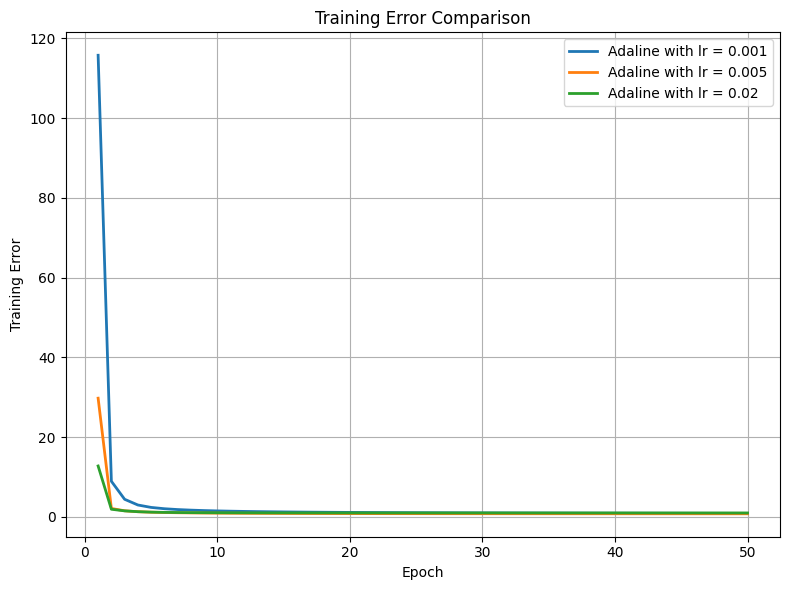

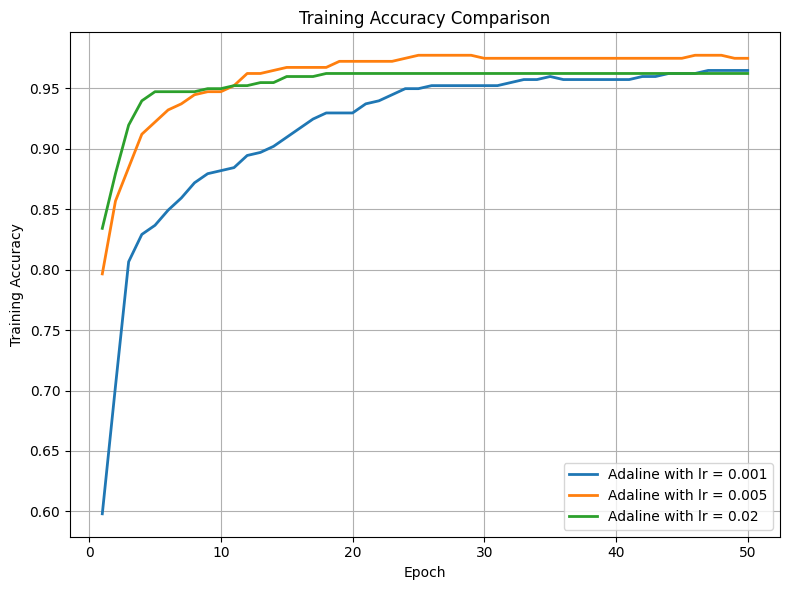

In [144]:
import matplotlib.pyplot as plt

epochs = range(1, len(errors_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, errors_1, label='Adaline with lr = 0.001', linewidth=2)
plt.plot(epochs, errors_2, label='Adaline with lr = 0.005', linewidth=2)
plt.plot(epochs, errors_3, label='Adaline with lr = 0.02', linewidth=2)

plt.title('Training Error Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


epochs = range(1, len(acc_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc_1, label='Adaline with lr = 0.001', linewidth=2)
plt.plot(epochs, acc_2, label='Adaline with lr = 0.005', linewidth=2)
plt.plot(epochs, acc_3, label='Adaline with lr = 0.02', linewidth=2)

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##### LDA and Logistic Regression

In [145]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log = metrics.accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log}%")

Accuracy: 0.935672514619883%


In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"Accuracy: {accuracy_lda}%")

Accuracy: 0.9532163742690059%


## 2.2 Madaline on Circles and Moons

### 2.2.1 Implement Madaline

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def activation(z):
    return np.tanh(z)

class Madaline:
    def __init__(self, n_hidden_neurons=3, lr=0.01, epochs=50, l2_lambda=0.001):
        self.n_hidden_neurons = n_hidden_neurons
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weight = None
        self.bias = None
        self.w_out = None
        self.b_out = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.random.randn(self.n_hidden_neurons, n_features)
        self.bias = np.random.randn(self.n_hidden_neurons)
        self.w_out = np.random.randn(self.n_hidden_neurons)
        self.b_out = np.random.randn()

        mse_list = []
        acc_list = []

        for ep in range(self.epochs):
            total_error = 0
            y_preds = np.zeros(n_samples)

            for i in range(n_samples):
                x = X[i]
                t = y[i]
                z_input = np.dot(self.weight, x) + self.bias
                z = activation(z_input)
                y_input = np.dot(self.w_out, z) + self.b_out
                y_pred = 1 if y_input >= 0 else -1
                y_preds[i] = y_pred

                if y_pred != t:
                    dz = 1 - z**2
                    delta_out = t - y_input
                    delta_hidden = delta_out * self.w_out * dz
                    self.w_out += self.lr * (delta_out * z - self.l2_lambda * self.w_out)
                    self.b_out += self.lr * delta_out
                    self.weight += self.lr * (delta_hidden[:, np.newaxis] * x - self.l2_lambda * self.weight)
                    self.bias += self.lr * delta_hidden

                total_error += 0.5 * (t - y_input) ** 2

            mse = total_error / n_samples
            acc = np.mean(y_preds == y)
            mse_list.append(mse)
            acc_list.append(acc)
            print(f"Epoch {ep+1}: MSE={mse:.6f}, Train Accuracy={acc*100:.2f}%")

        return mse_list, acc_list

    def predict(self, X):
        z_input = np.dot(self.weight, X.T) + self.bias[:, np.newaxis]
        z = activation(z_input)
        pred_scores = np.dot(self.w_out, z) + self.b_out
        preds = np.where(pred_scores >= 0, 1, -1)
        return preds, pred_scores


### 2.2.2 Data and learning configuration

In [148]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
Xmoons, ymoons = make_moons(n_samples=600, noise=0.25, random_state=0)

Xmoons_train, Xmoons_test, ymoons_train, ymoons_test = train_test_split(
    Xmoons, ymoons, test_size=0.3, random_state=0, stratify=ymoons
)
ymoons_train= np.where(ymoons_train == 0, -1, 1)
ymoons_test = np.where(ymoons_test == 0, -1, 1)



In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xmoons_train_scaled = scaler.fit_transform(Xmoons_train)
Xmoons_test_scaled = scaler.transform(Xmoons_test)
df_train_moons = pd.DataFrame(Xmoons_train_scaled)
df_train_moons['target'] = ymoons_train
df_train_moons.head(10)


,0,1,target
0,1.408343,-0.854108,1
1,0.542141,0.469628,-1
2,1.142545,-0.455763,1
3,-0.157882,0.108816,1
4,1.854422,0.622311,1
5,-1.082033,0.820506,-1
6,1.406062,-1.047086,1
7,1.897500,0.148619,1
8,-1.775155,0.216631,-1
9,-1.878871,-0.075830,-1


In [184]:
# Define model configurations
configs = [
    {"lr": 0.001,  "n_iter": 50, "n_hidden_neurons": 3, "l2_penalty": 0.001},
    {"lr": 0.001,  "n_iter": 50, "n_hidden_neurons": 3, "l2_penalty": 0},
    {"lr": 0.001,  "n_iter": 50, "n_hidden_neurons": 5, "l2_penalty": 0.001},
    {"lr": 0.001,  "n_iter": 50, "n_hidden_neurons": 5, "l2_penalty": 0},
]

# Initialize and store all models
Madaline_models_moons = [
    Madaline(
        lr=c["lr"],
        epochs=c["n_iter"],
        n_hidden_neurons=c["n_hidden_neurons"],
        l2_lambda=c["l2_penalty"]
    )
    for c in configs
]

# Prepare history containers
mse_histories_moons = []
acc_histories_moons = []

# Train all models in a loop
for idx, model in enumerate(Madaline_models_moons, start=1):
    print(f"\n🔹 Training Madaline_{idx} (m={model.n_hidden_neurons}, L2={model.l2_lambda}, epochs={model.epochs})")
    mse_history, acc_history = model.train(Xmoons_train_scaled, ymoons_train)
    mse_histories_moons.append(mse_history)
    acc_histories_moons.append(acc_history)

print("\n✅ Training complete for all models!")



🔹 Training Madaline_1 (m=3, L2=0.001, epochs=50)
Epoch 1: MSE=0.908740, Train Accuracy=49.05%
Epoch 2: MSE=0.508218, Train Accuracy=58.57%
Epoch 3: MSE=0.376126, Train Accuracy=67.14%
Epoch 4: MSE=0.321889, Train Accuracy=72.14%
Epoch 5: MSE=0.298968, Train Accuracy=78.33%
Epoch 6: MSE=0.292366, Train Accuracy=79.29%
Epoch 7: MSE=0.291346, Train Accuracy=79.52%
Epoch 8: MSE=0.293262, Train Accuracy=80.48%
Epoch 9: MSE=0.297014, Train Accuracy=81.43%
Epoch 10: MSE=0.300893, Train Accuracy=80.71%
Epoch 11: MSE=0.305381, Train Accuracy=80.71%
Epoch 12: MSE=0.309704, Train Accuracy=80.71%
Epoch 13: MSE=0.314111, Train Accuracy=80.95%
Epoch 14: MSE=0.318060, Train Accuracy=80.71%
Epoch 15: MSE=0.321888, Train Accuracy=80.48%
Epoch 16: MSE=0.325006, Train Accuracy=80.95%
Epoch 17: MSE=0.328468, Train Accuracy=80.95%
Epoch 18: MSE=0.331785, Train Accuracy=80.71%
Epoch 19: MSE=0.334771, Train Accuracy=81.19%
Epoch 20: MSE=0.338062, Train Accuracy=81.19%
Epoch 21: MSE=0.340556, Train Accuracy=

In [185]:
for i, (mse, acc, model) in enumerate(zip(mse_histories_moons, acc_histories_moons, Madaline_models_moons), start=1):
    print(f"Madaline_{i}: m={model.n_hidden_neurons}, L2={model.l2_lambda}, epochs={model.epochs}")
    print(f"  Final Accuracy: {acc[-1]:.4f} | Final MSE: {mse[-1]}\n")


Madaline_1: m=3, L2=0.001, epochs=50
  Final Accuracy: 0.8548 | Final MSE: 0.4070463888083429

Madaline_2: m=3, L2=0, epochs=50
  Final Accuracy: 0.8119 | Final MSE: 0.3953182602709862

Madaline_3: m=5, L2=0.001, epochs=50
  Final Accuracy: 0.7786 | Final MSE: 0.4751083371843055

Madaline_4: m=5, L2=0, epochs=50
  Final Accuracy: 0.8952 | Final MSE: 0.27948055379969633



### Accuracy, Recall, Precision, F1

In [186]:
from sklearn import metrics
best_idx = np.argmax([acc_history[-1] for acc_history in acc_histories_moons])
best_model = Madaline_models_moons[best_idx]
print(f"Best Model: Madaline_{best_idx + 1}")
best_preds_moons, best_scores_moons = Madaline_models_moons[best_idx].predict(Xmoons_test_scaled)


accuracy = metrics.accuracy_score(ymoons_test, best_preds_moons)
precision = metrics.precision_score(ymoons_test, best_preds_moons)
recall = metrics.recall_score(ymoons_test, best_preds_moons)
f1 = metrics.f1_score(ymoons_test, best_preds_moons)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1}")

Best Model: Madaline_4
Accuracy: 0.8555555555555555
Precision: 0.8404255319148937
Recall: 0.8777777777777778
F1 Score: 0.8586956521739131


### Confusion Matrix

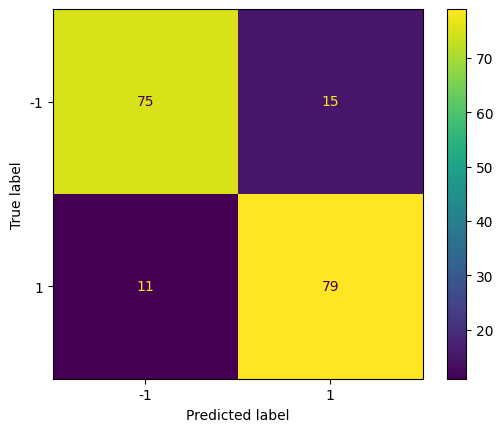

In [187]:
confusion_matrix_moons = metrics.confusion_matrix(ymoons_test, best_preds_moons)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_moons, display_labels = [-1, 1])
cm_display.plot()
plt.show()

### ROC AUC

ROC AUC:  0.9308641975308642


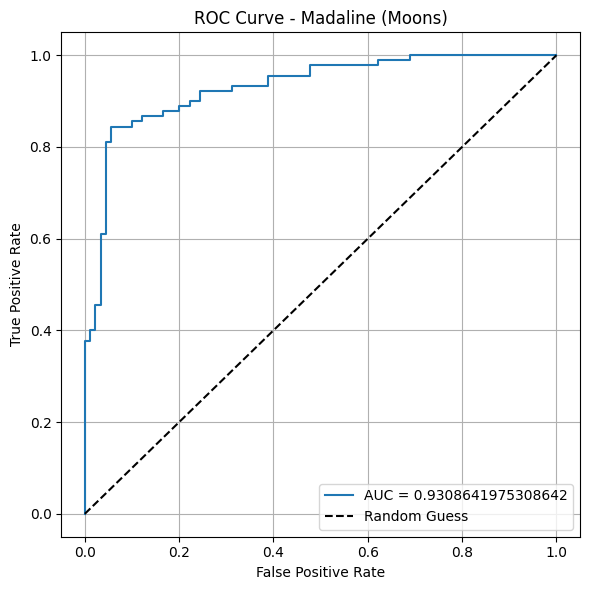

In [188]:
fpr, tpr, thresholds = metrics.roc_curve(ymoons_test, best_scores_moons)
auc_moons = metrics.roc_auc_score(ymoons_test, best_scores_moons)

print(f"ROC AUC: ", auc_moons)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_moons}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Madaline (Moons)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

###  Decision Boundary

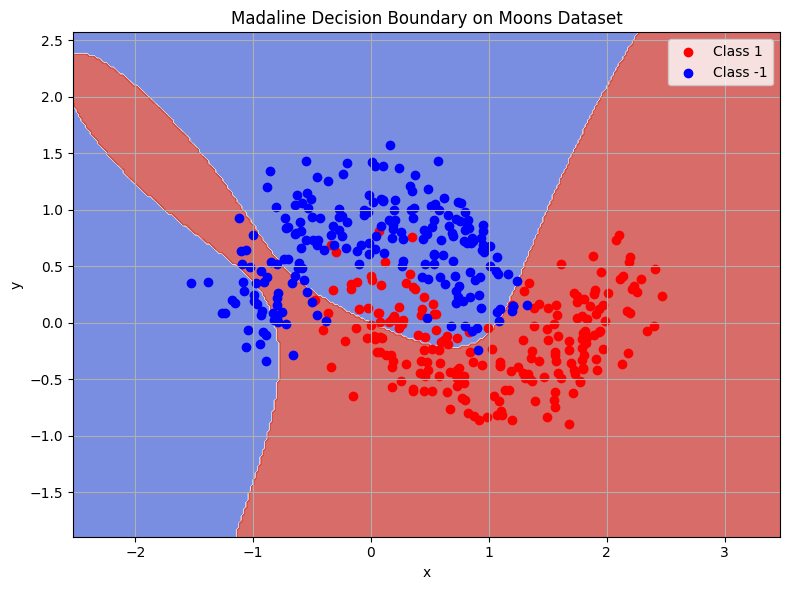

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    preds, _ = model.predict(grid_points)
    preds = np.array(preds)
    preds = preds.reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label="Class -1")
    
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

best_model = Madaline_models_moons[best_idx] 

plt.figure(figsize=(8, 6))
plot_decision_boundary(Xmoons_train, ymoons_train, best_model, title="Madaline Decision Boundary on Moons Dataset")
plt.show()


### Training accuracy and Error

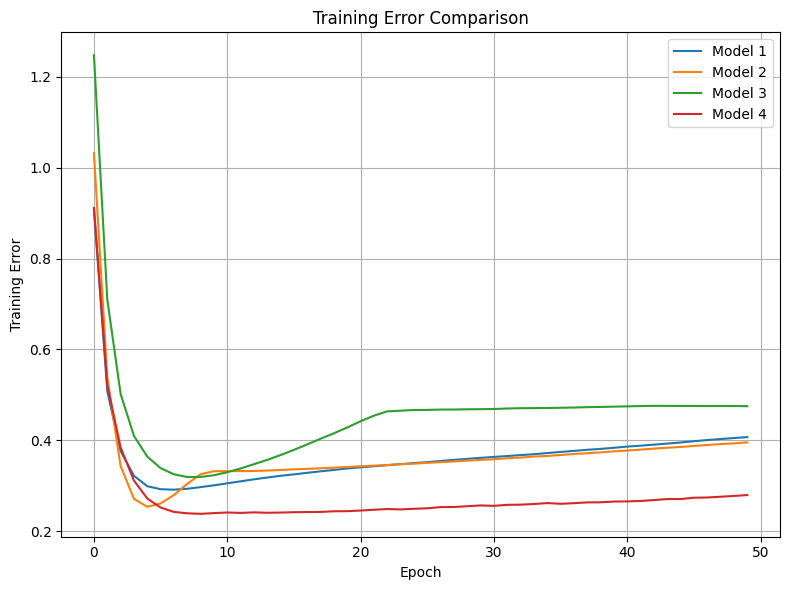

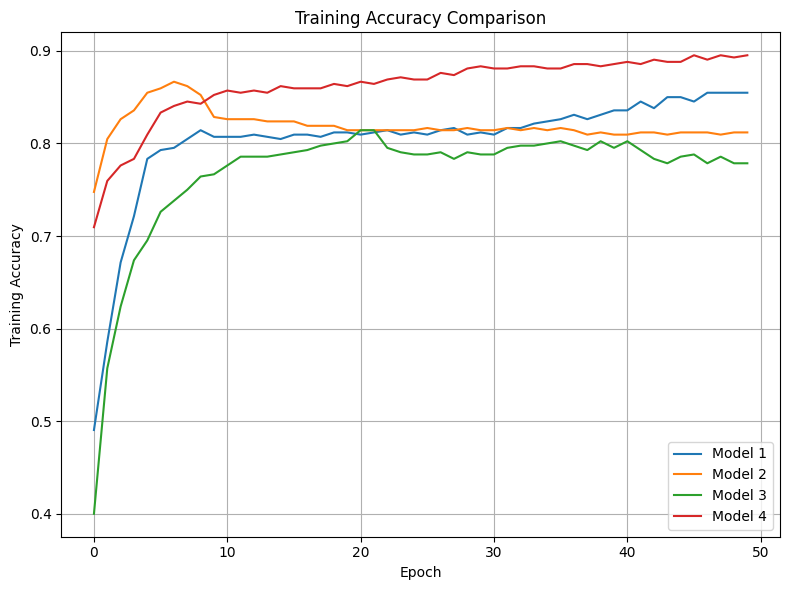

In [ ]:
epochs = range(50)
plt.figure(figsize=(8, 6))
for i, mse_history in enumerate(mse_histories_moons):
    plt.plot(epochs, mse_history, label=f'Model {i+1}', linewidth=1.5)



plt.title('Training Error Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


epochs = range(50)
plt.figure(figsize=(8, 6))
for i, acc_history in enumerate(acc_histories_moons):
    plt.plot(epochs, acc_history, label=f'Model {i+1}', linewidth=1.5)

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Circles

# Create Table and summarize results for moons and circles over seeds 0,1,2

In [157]:
Xcircles, ycircles = make_circles(n_samples=600, noise=0.1, random_state=0)

Xcircles_train, Xcircles_test, ycircles_train, ycircles_test = train_test_split(
    Xcircles, ycircles, test_size=0.3, random_state=0, stratify=ycircles
)

ycircles_train= np.where(ycircles_train == 0, -1, 1)
ycircles_test = np.where(ycircles_test == 0, -1, 1)

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xcircles_train_scaled = scaler.fit_transform(Xcircles_train)
Xcircles_test_scaled = scaler.transform(Xcircles_test)
df_train_circles = pd.DataFrame(Xcircles_train_scaled)
df_train_circles['target'] = ycircles_train
df_train_circles.head(10)

,0,1,target
0,0.027160,-1.172373,1
1,1.419680,0.916607,-1
2,0.028112,-1.066235,1
3,-0.021782,1.593813,1
4,1.213908,-0.386752,1
5,-0.120479,-1.492710,-1
6,-0.037706,-1.217988,1
7,1.199836,-0.589829,1
8,0.466324,-1.466858,-1
9,1.397699,-0.312565,-1


In [ ]:
configs = [
    {"lr": 0.001, "epoch": 50, "n_hidden_neurons": 10, "l2_lambda": 0.001},
    {"lr": 0.001, "epoch": 50, "n_hidden_neurons": 10, "l2_lambda": 0},
    {"lr": 0.001, "epoch": 50, "n_hidden_neurons": 15, "l2_lambda": 0.001},
    {"lr": 0.001, "epoch": 50, "n_hidden_neurons": 15, "l2_lambda": 0},
]

Madaline_models_circles = [
    Madaline(
        lr=c["lr"],
        epochs=c["epoch"],
        n_hidden_neurons=c["n_hidden_neurons"],
        l2_lambda=c["l2_lambda"]
    )
    for c in configs
]


mse_histories_circles = []
acc_histories_circles = []
for idx, model in enumerate(Madaline_models_circles, start=1):
    print(f"\n🔹 Training Madaline_{idx} (m={model.n_hidden_neurons}, L2={model.l2_lambda}, epochs={model.epochs})")
    mse_history, acc_history = model.train(Xcircles_train_scaled, ycircles_train)
    mse_histories_circles.append(mse_history)
    acc_histories_circles.append(acc_history)
print("\nTraining complete for all models!")



🔹 Training Madaline_1 (m=10, L2=0.001, epochs=50)
Epoch 1: MSE=1.952881, Train Accuracy=50.48%
Epoch 2: MSE=0.603672, Train Accuracy=37.38%
Epoch 3: MSE=0.578760, Train Accuracy=39.05%
Epoch 4: MSE=0.561921, Train Accuracy=37.14%
Epoch 5: MSE=0.549086, Train Accuracy=36.90%
Epoch 6: MSE=0.539047, Train Accuracy=37.62%
Epoch 7: MSE=0.530291, Train Accuracy=41.19%
Epoch 8: MSE=0.523037, Train Accuracy=40.48%
Epoch 9: MSE=0.516846, Train Accuracy=41.90%
Epoch 10: MSE=0.512441, Train Accuracy=41.43%
Epoch 11: MSE=0.508293, Train Accuracy=41.90%
Epoch 12: MSE=0.504572, Train Accuracy=41.43%
Epoch 13: MSE=0.501422, Train Accuracy=41.67%
Epoch 14: MSE=0.497671, Train Accuracy=42.86%
Epoch 15: MSE=0.495171, Train Accuracy=41.90%
Epoch 16: MSE=0.492540, Train Accuracy=44.52%
Epoch 17: MSE=0.490498, Train Accuracy=45.24%
Epoch 18: MSE=0.487606, Train Accuracy=46.67%
Epoch 19: MSE=0.485964, Train Accuracy=47.86%
Epoch 20: MSE=0.483806, Train Accuracy=48.10%
Epoch 21: MSE=0.482830, Train Accuracy

In [160]:
for i, (mse, acc, model) in enumerate(zip(mse_histories_circles, acc_histories_circles, Madaline_models_circles), start=1):
    print(f"Madaline_{i}: m={model.n_hidden_neurons}, L2={model.l2_lambda}, epochs={model.epochs}")
    print(f"  Final Accuracy: {acc[-1]:.4f} | Final MSE: {mse[-1]}\n")


Madaline_1: m=10, L2=0.001, epochs=50
  Final Accuracy: 0.7024 | Final MSE: 0.47273484598496096

Madaline_2: m=10, L2=0, epochs=50
  Final Accuracy: 0.7357 | Final MSE: 0.4858521449394612

Madaline_3: m=15, L2=0.001, epochs=50
  Final Accuracy: 0.8000 | Final MSE: 0.4288277996799716

Madaline_4: m=15, L2=0, epochs=50
  Final Accuracy: 0.7452 | Final MSE: 0.4509238226685104



In [161]:
from sklearn import metrics
best_idx = np.argmax([acc_history[-1] for acc_history in acc_histories_circles])
best_model = Madaline_models_circles[best_idx]
print(f"Best Model: Madaline_{best_idx + 1}")
best_preds_circles, best_scores_circles = Madaline_models_circles[best_idx].predict(Xcircles_test_scaled)


accuracy = metrics.accuracy_score(ycircles_test, best_preds_circles)
precision = metrics.precision_score(ycircles_test, best_preds_circles)
recall = metrics.recall_score(ycircles_test, best_preds_circles)
f1 = metrics.f1_score(ycircles_test, best_preds_circles)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1}")

Best Model: Madaline_3
Accuracy: 0.7722222222222223
Precision: 0.7816091954022989
Recall: 0.7555555555555555
F1 Score: 0.768361581920904


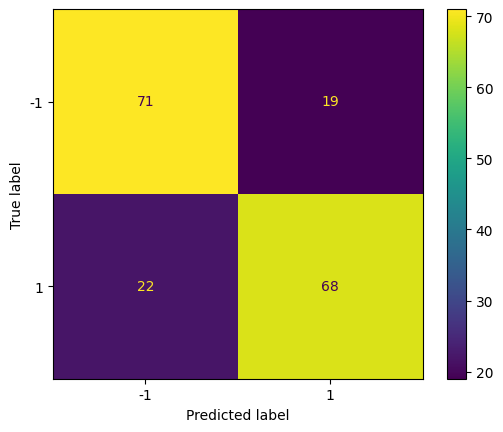

In [162]:
confusion_matrix_circles = metrics.confusion_matrix(ycircles_test, best_preds_circles)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_circles, display_labels = [-1, 1])
cm_display.plot()
plt.show()

ROC AUC:  0.8758024691358025


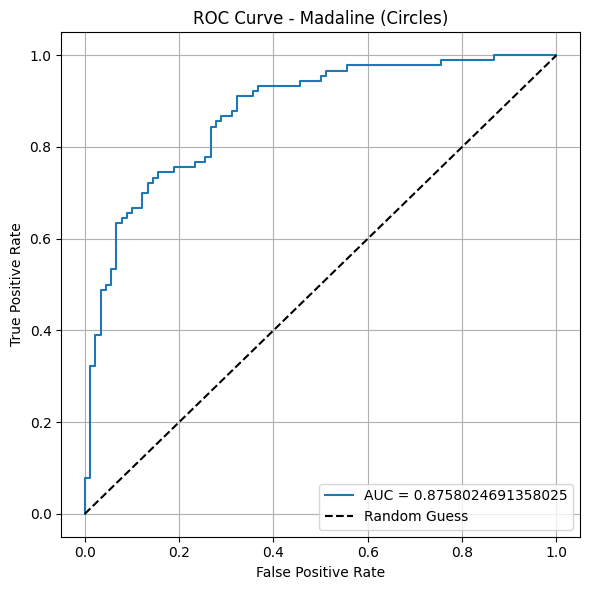

In [163]:
fpr, tpr, thresholds = metrics.roc_curve(ycircles_test, best_scores_circles)
auc_circles= metrics.roc_auc_score(ycircles_test, best_scores_circles)

print(f"ROC AUC: ", auc_circles)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_circles}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Madaline (Circles)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

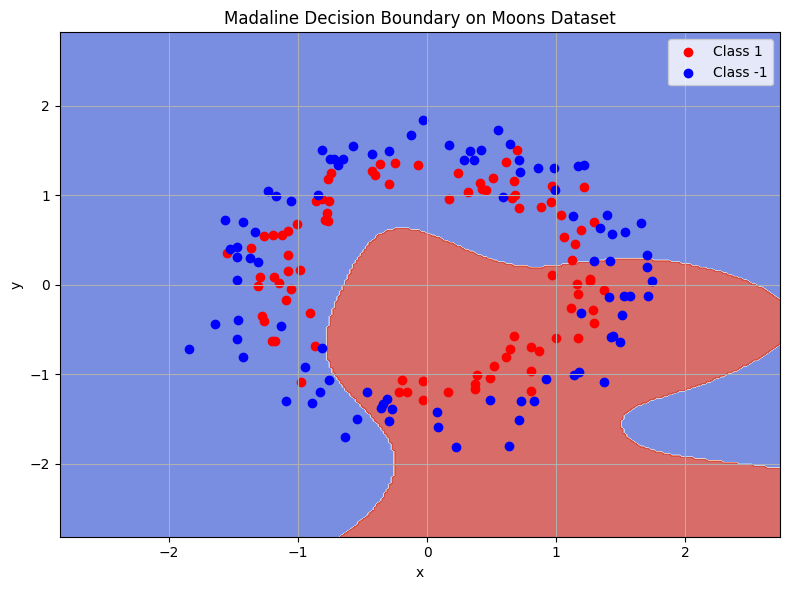

In [164]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    preds, _ = model.predict(grid_points)
    preds = np.array(preds)
    preds = preds.reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label="Class -1")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

best_model = Madaline_models_moons[best_idx]

plt.figure(figsize=(8, 6))
plot_decision_boundary(Xcircles_test_scaled, ycircles_test, best_model, title="Madaline Decision Boundary on Moons Dataset")
plt.show()


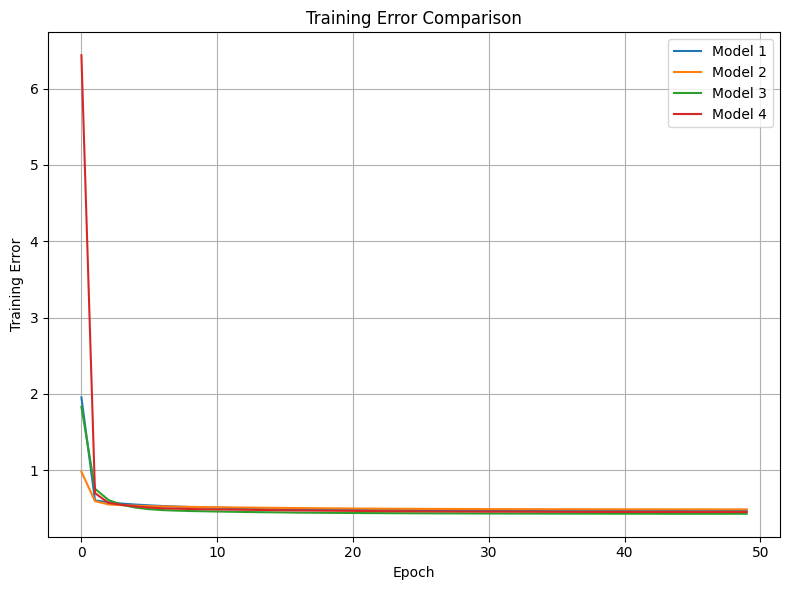

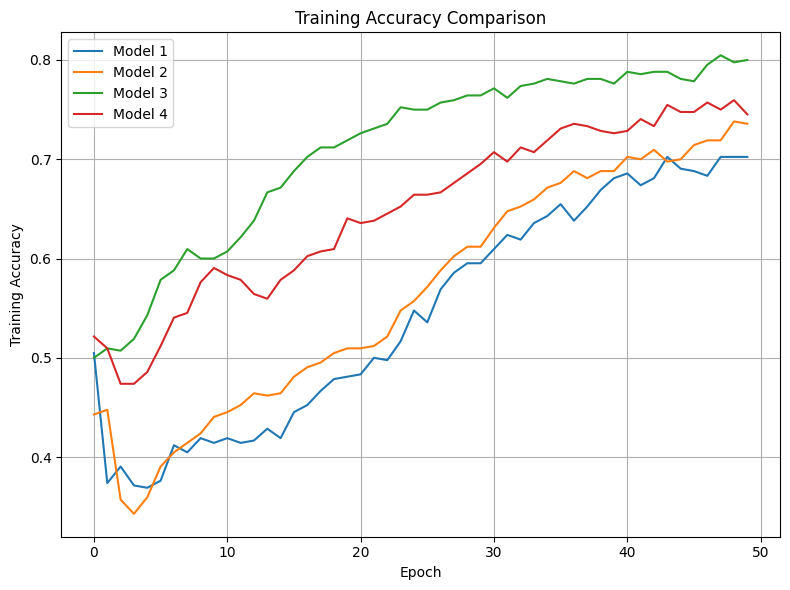

In [195]:
epochs = range(50)
plt.figure(figsize=(8, 6))
for i, mse_history in enumerate(mse_histories_circles):
    plt.plot(epochs, mse_history, label=f'Model {i+1}', linewidth=1.5)

plt.title('Training Error Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


epochs = range(50)
plt.figure(figsize=(8, 6))
for i, acc_history in enumerate(acc_histories_circles):
    plt.plot(epochs, acc_history, label=f'Model {i+1}', linewidth=1.5)

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1: MSE=3.441717, Train Accuracy=51.90%
Epoch 2: MSE=0.583663, Train Accuracy=60.24%
Epoch 3: MSE=0.485027, Train Accuracy=63.81%
Epoch 4: MSE=0.437718, Train Accuracy=65.95%
Epoch 5: MSE=0.406155, Train Accuracy=70.24%
Epoch 6: MSE=0.385306, Train Accuracy=71.67%
Epoch 7: MSE=0.373923, Train Accuracy=71.43%
Epoch 8: MSE=0.357558, Train Accuracy=74.05%
Epoch 9: MSE=0.349035, Train Accuracy=76.19%
Epoch 10: MSE=0.345713, Train Accuracy=76.43%
Epoch 11: MSE=0.340320, Train Accuracy=78.10%
Epoch 12: MSE=0.340395, Train Accuracy=78.10%
Epoch 13: MSE=0.334802, Train Accuracy=78.81%
Epoch 14: MSE=0.332930, Train Accuracy=77.86%
Epoch 15: MSE=0.331368, Train Accuracy=78.33%
Epoch 16: MSE=0.328137, Train Accuracy=79.52%
Epoch 17: MSE=0.329103, Train Accuracy=80.48%
Epoch 18: MSE=0.328765, Train Accuracy=80.00%
Epoch 19: MSE=0.326824, Train Accuracy=78.81%
Epoch 20: MSE=0.327035, Train Accuracy=78.57%
Epoch 21: MSE=0.325045, Train Accuracy=78.81%
Epoch 22: MSE=0.327762, Train Accuracy=79.7

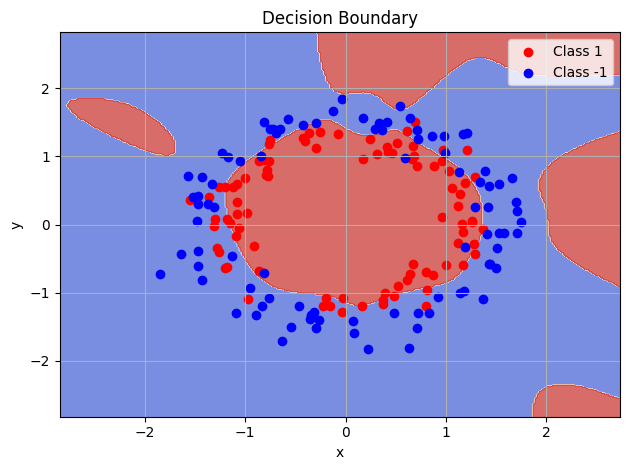

In [166]:
mdl = Madaline(lr=0.001, epochs=100, n_hidden_neurons=100, l2_lambda=0.001)
mdl.train(Xcircles_train_scaled, ycircles_train)
preds, scores = mdl.predict(Xcircles_test_scaled)
plot_decision_boundary(Xcircles_test_scaled, ycircles_test, mdl)
accuracy = metrics.accuracy_score(ycircles_test, preds)
precision = metrics.precision_score(ycircles_test, preds)
recall = metrics.recall_score(ycircles_test, preds)
f1 = metrics.f1_score(ycircles_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1}")